In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
import re
import datetime
from facebook_scraper import get_posts, get_profile
from time import sleep
from googletrans import Translator

C:\Users\nhuyh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Đọc dữ liệu file
df = pd.read_csv('Data/LordsMobileVN_clean.csv')

# Xử lí comment

In [4]:
def get_comments(text):
    pattern = r"\{[^{}]*\}"
    matches = re.findall(pattern, text)
    result = [eval(match) for match in matches]
    return result

# Tạo một DataFrame mới cho comments

Gồm các thuộc tính sau : 

- comment_id
- commenter_id
- comment_text
- comment_time
- comment_reactions
- post_id

In [5]:
def createCommentsFrame(df):
    df_result = {"comment_id" : [],
                 "commenter_id" : [],
                   "comment_text" : [],
                   "comment_time" : [],
                   "comment_reactions" : [],
                   "post_id" : []}
    
    new_df = df[~df["comments_full"].isna()]
    for index, rows in new_df.iterrows():
        x = rows["comments_full"]
        for comment in get_comments(x):
            try:
                df_result['comment_id'].append(comment['comment_id'])
                df_result['commenter_id'].append(comment['commenter_id'])
                df_result['comment_text'].append(comment['comment_text'])
                df_result['comment_time'].append(comment['comment_time'])
                df_result['comment_reactions'].append(comment['comment_reactions'])
                df_result['post_id'].append(rows.post_id)
            except:
                continue
    return pd.DataFrame(df_result)

In [6]:
df_comment = createCommentsFrame(df)
df_comment

,comment_id,commenter_id,comment_text,comment_time,comment_reactions,post_id
0,311719684964358,100007411590912,Chủ game chắc nó giầu vãi,2023-11-13 23:49:00,None,752698296898984
1,6957330744328745,100040030605215,.,2023-11-13 23:16:00,None,752698296898984
2,729455188515040,100016409943616,Ad cug chơi nông trại như ngta mới bít thui,2023-11-13 21:00:00,None,744907481011399
3,878732183412971,100002344420914,Bang ngta deff rally. Bang t deff rally nhưng ...,2023-11-13 18:00:00,None,744907481011399
4,854447549482933,100021994396973,Vừa kvk xong thua be bét.,2023-11-13 16:00:00,None,744907481011399
...,...,...,...,...,...,...
4410,665009785197223,100024432611793,"Ảnh nhìn quen quen nhỉ,. giống của a Sup quá",2023-08-14 00:00:00,None,683580670477414
4411,276891101629111,100040989850689,😄,2023-08-14 00:00:00,None,683580670477414
4412,1033424044313676,100006890527736,Tiền việt có mà cả tỉ đồng. Không có vài tỏi đâu.,2023-08-14 00:00:00,None,683580670477414
4413,213912384958987,100013533668698,Lỏ thủ,2023-08-14 00:00:00,None,683580670477414


# Phân tích comment

1. Tổng số comment và số comment trung bình

In [7]:
# Tổng số lượng comment
sum(df['comments'])

12543

In [8]:
# số lượng comment trung bình
df['comments'].mean()

62.715

2. Biến động comment qua từng bài đăng

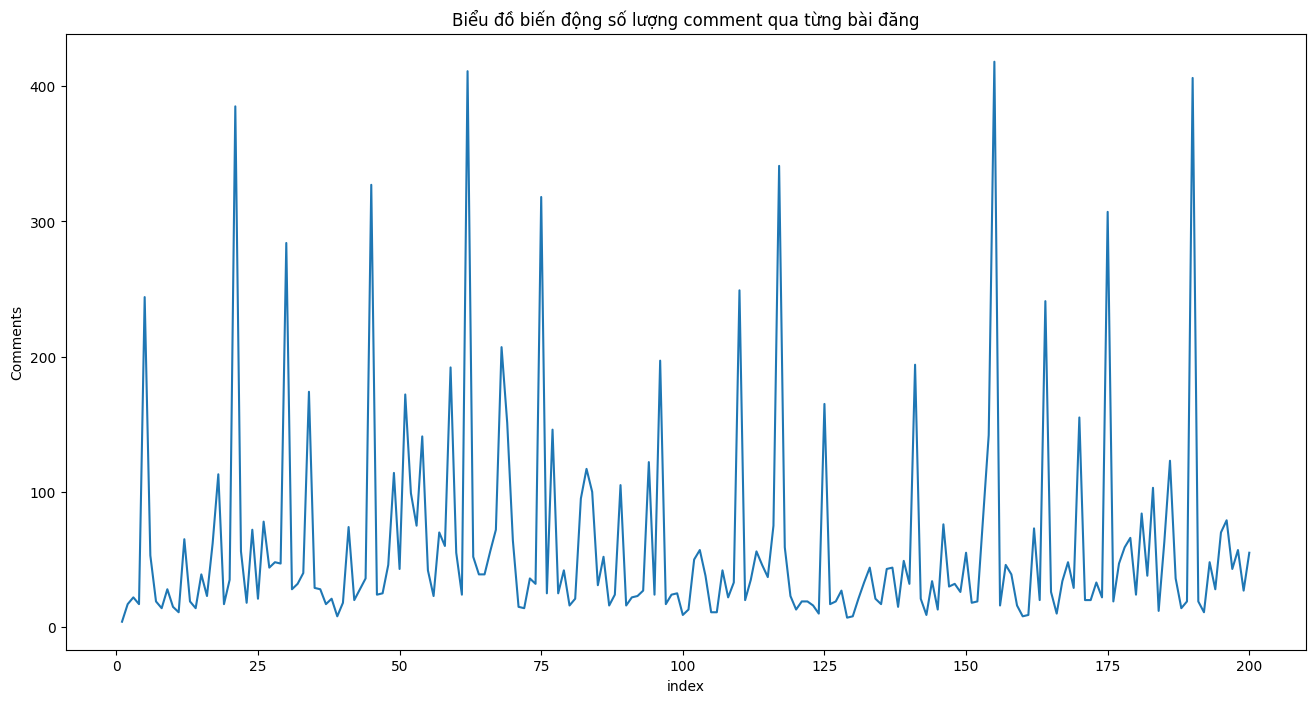

In [9]:
# Bến động số lượng comment qua từng bài đăng
plt.figure(figsize=(16,8))
plt.xlabel("index")
plt.ylabel("Comments")
plt.title("Biểu đồ biến động số lượng comment qua từng bài đăng")
plt.plot(df['index'],df['comments'])
plt.show()

3. Từ ngữ được dùng nhiều nhất trong các comment

In [10]:
text = df_comment["comment_text"].str.cat(sep = ' ')
text

'Chủ game chắc nó giầu vãi . Ad cug chơi nông trại như ngta mới bít thui Bang ngta deff rally. Bang t deff rally nhưng toàn gặp acc đại đế với full champ 12+ Vừa kvk xong thua be bét. Nhà rồng mộng mơ cày chay hog bt có lấy đc ko phiêu wa\U0001f979\U0001f979 Tôi full hết rồi Kvk bay 1/3 lính Hữu Quang lm2023 lm001 Cày con acc tâm huyết mất mẹn nó=)) Ngon . Kvk tan nát luôn Cho vài k di thư đi ad. Còn thiếu 3k nữa mới có t5. Hichic Ad ơi phát code lẹ điiiiii đói sắp chết r kvk chết quá nhìu lính r cần 1 thứ j đó để bồi bổ cơ thể \U0001f979 Mới được ông bc cho 5 cái dịch chuyển \U0001faf0 Ước được nhận quà Chơi game 7năm chưa 1 lần nổ hủ Cho code đi igg Nhận hoài mà có dc 10 gem. Nên chả quan tâm Nay k thấy có code nhỉ Lâu lâu mới được 1 cái:) Có lại may Có gì đâu mà sốc 1277282565 Top fan\nNgọc Gemma Ko sốc lắm chỉ sốc nặng :))) ID:640991056 Xin code đi igg codeeeee igg id-787632664 Ngọc Bảo lên lúa mạch chuẩn bị ăn mừng Noel bác eiii Lords Mobile bảo trì xong hết lag không chứ lag quá 

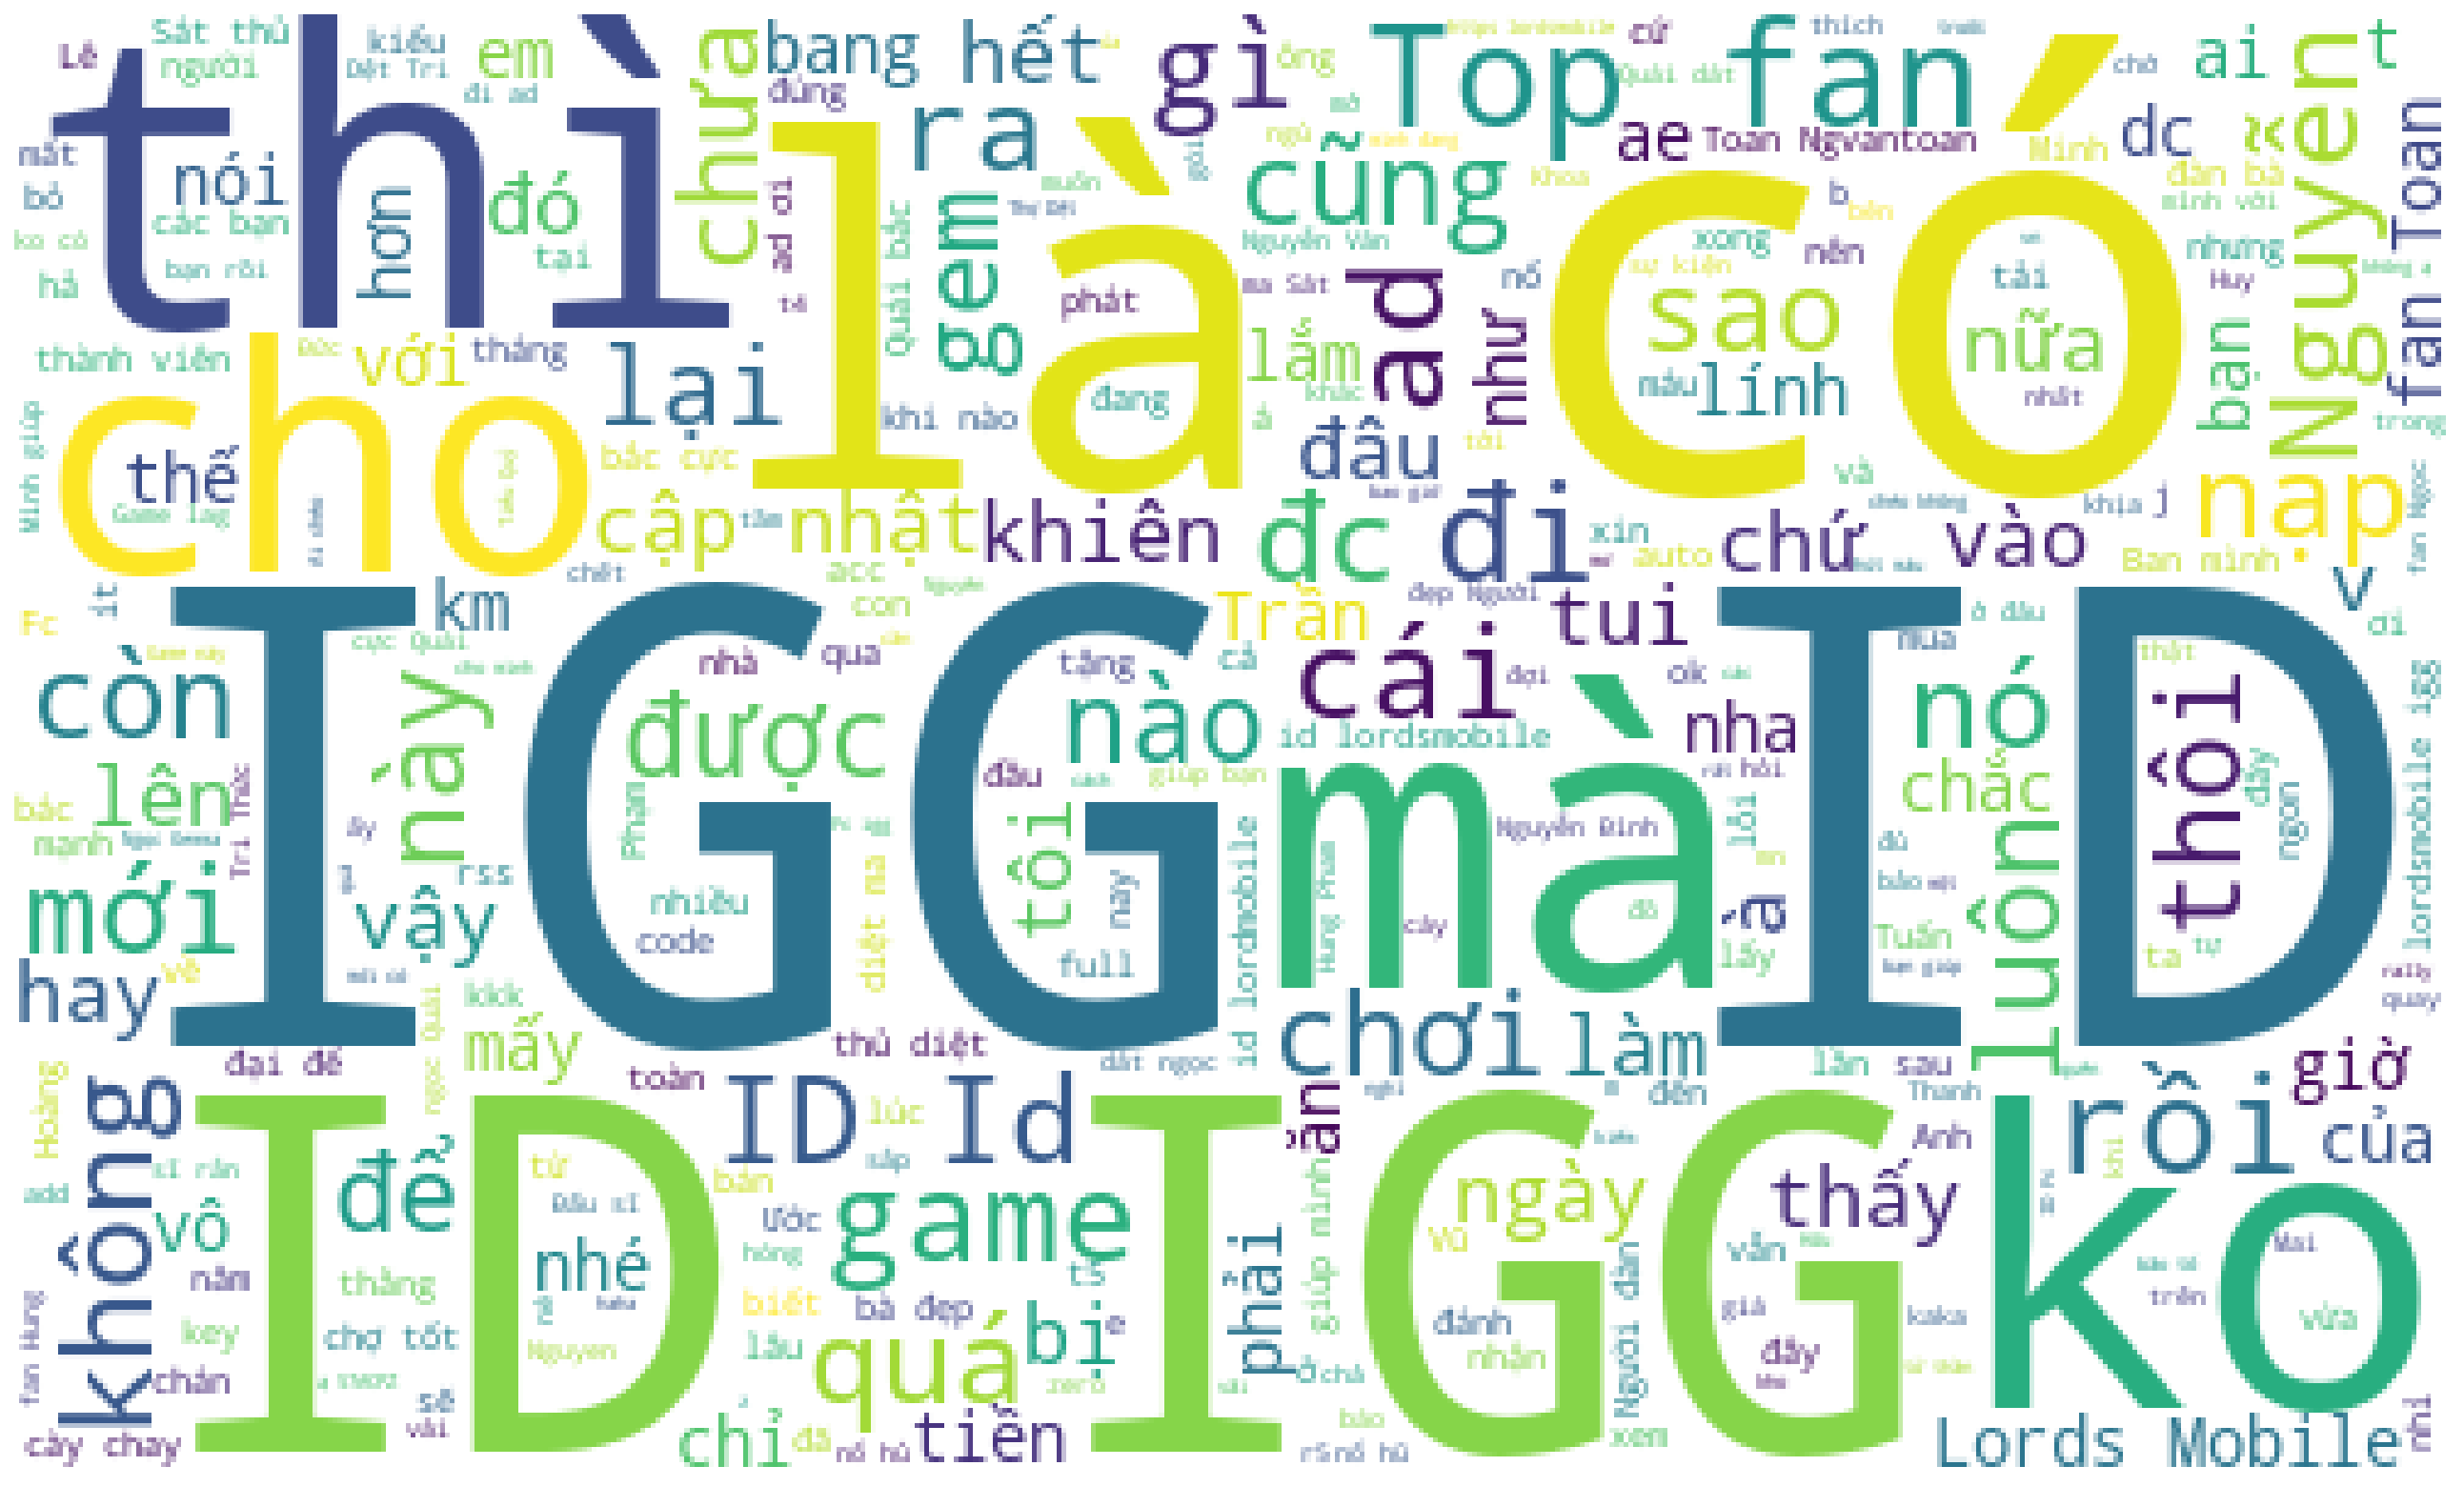

In [11]:
# Import WordCloud library
from wordcloud import WordCloud
from pathlib import Path
import os
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
texto = text
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=500, height=300
                         ).generate(texto)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

4. Số lượng comment theo thứ trong tuần

In [12]:
df_comment['comment_time'] = pd.to_datetime(df_comment['comment_time'])

In [13]:
week_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_comment['week_day'] = df_comment['comment_time'].apply(lambda x: week_day[x.weekday()])

Text(0, 0.5, 'Comments')

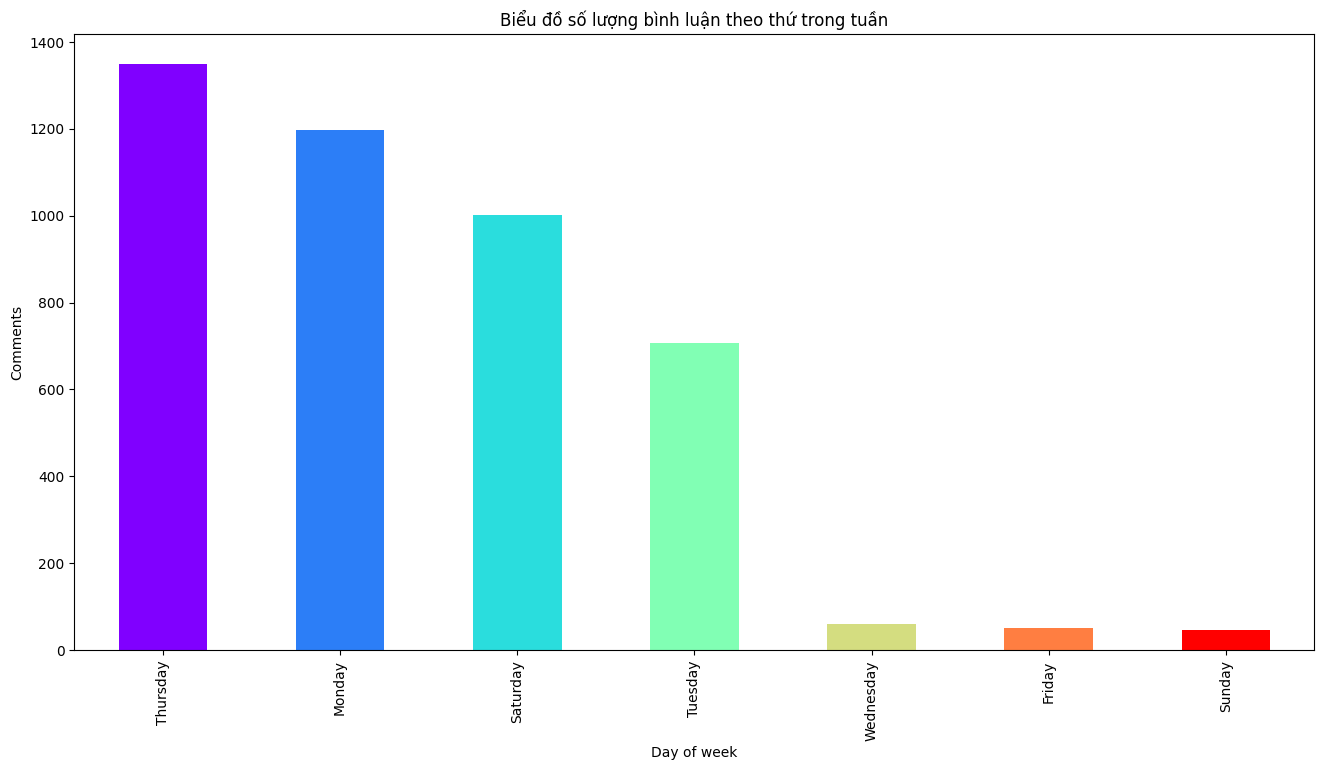

In [14]:
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, len(df_comment['week_day'] .unique())))
df_comment['week_day'] .value_counts().plot(kind='bar', figsize=(16,8), color=colors)
plt.title('Biểu đồ số lượng bình luận theo thứ trong tuần')
plt.xlabel('Day of week')
plt.ylabel('Comments')

4. Biểu đồ tương quan giữa comment với reactions, share

Text(0, 0.5, 'Total')

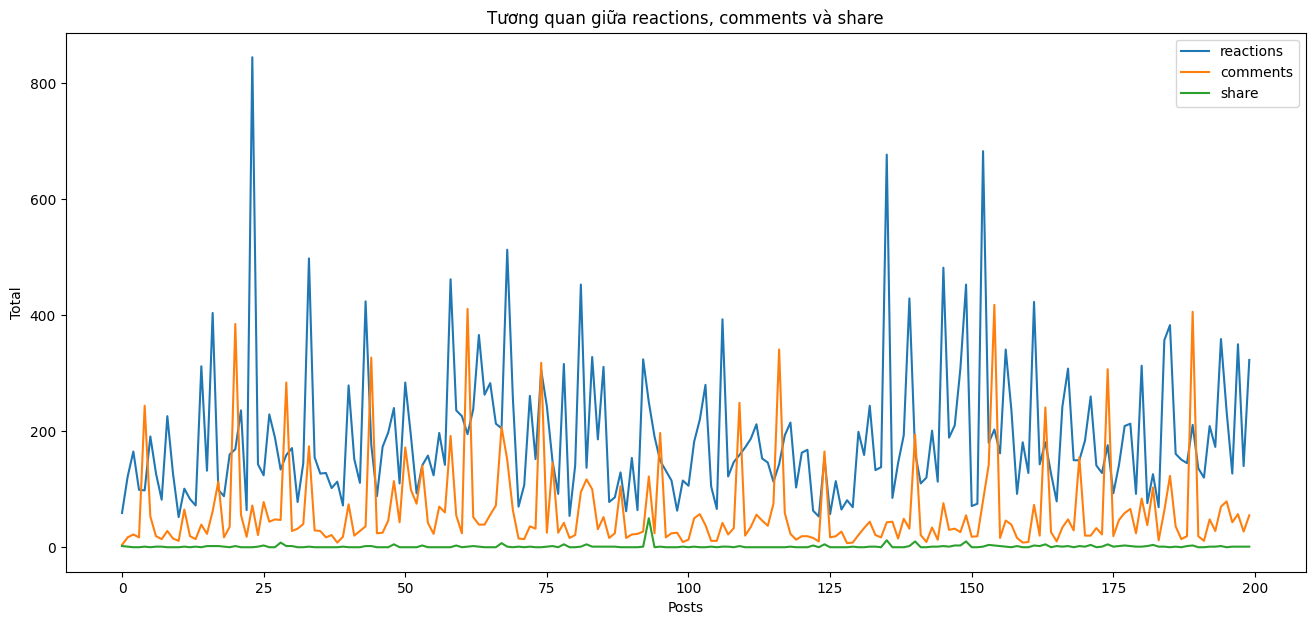

In [15]:
fig_3, ax_3 = plt.subplots(1,1)
ax_3.plot(df['reaction_count'],label = 'reactions')
ax_3.plot(df['comments'], label = 'comments')
ax_3.plot(df['shares'],label = 'share')
ax_3.legend()
fig_3.set_figwidth(16)
fig_3.set_figheight(7)
ax_3.set_title("Tương quan giữa reactions, comments và share")
ax_3.set_xlabel("Posts")
ax_3.set_ylabel("Total")

# Phân tích thông tin người comment

1. Lấy dữ liệu người comment

In [16]:
# Tạo một list_userid rỗng
list_userID = []

# Thêm danh sách vào list_userid
list_userID.extend(df_comment['commenter_id'])

# In danh sách
print(list_userID)


['100007411590912', '100040030605215', '100016409943616', '100002344420914', '100021994396973', '100087329203939', '100014934040810', '100086138772768', '100080540238543', '100083303108110', '100050996387525', '100040030605215', '100009302045039', '100003739046013', '100086138772768', '100078135267637', '100009166765761', '100076824145530', '100016433688619', '100002344420914', '100009302045039', '100020760530562', '100014323175978', '100016851524242', '1618145575', '100093093087863', '100069432646870', '100050996387525', '100007547078164', '100087558649618', '100091902114810', '100064764606324', '100016873544811', '100038301201213', '100076381045596', '61553264435858', '100042822527710', '100050996387525', '100009333442290', '100069432646870', '100007547078164', '100014109306944', '100005082940430', '100086750801146', '100024943623239', '100024943623239', '100026779807832', '100009463961711', '100038912809608', '100004001592465', '100036707231427', '100024110625956', '100092535903511'

In [53]:
list_userID = [id[id.rfind('/') + 1:] for id in list_userID]

In [54]:
commenter = []
for id in list_userID:
    try:
        user = get_profile(id)
        commenter.append(user)
        print(f"{len(commenter)}{user}")
    except:
        continue

1{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo': 'https://scontent.fhan17-1.fna.fbcdn.net/v/t1.6435-9/120762326_2785390628384630_19150542431387378_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=111&ccb=1-7&_nc_sid=d668b3&_nc_ohc=MBFVEr7xwf0AX97_S1W&_nc_ht=scontent.fhan17-1.fna&oh=00_AfDmKJATeRr-LgP8GOqBn1KRdSei73UwiDMV18H78NC5RQ&oe=659632CC', 'profile_picture': 'https://scontent.fhan17-1.fna.fbcdn.net/v/t1.6435-1/118652328_2753179088272451_3546917869573352201_n.jpg?stp=cp0_dst-jpg_e15_p120x120_q65&_nc_cat=101&ccb=1-7&_nc_sid=db1b99&_nc_ohc=ZsYHsqFvFTIAX-OnOLv&_nc_ht=scontent.fhan17-1.fna&oh=00_AfDy94-pKeXZ5gKADltY67BvStSuQD7lykqpUnkRS9Qx5w&oe=659616C0', 'id': '100007411590912', 'Name': 'Đỗ Văn Hiền Duy', 'Công việc': 'Nam Định\nCông dân ưu tú', 'Học vấn': 'Quân đội Nhân Dân\nCao đẳng/Đại học\nTốt nghiệp năm 2013', 'Nơi từng sống': 'Thái Nguyên\nTỉnh/Thành phố hiện tại\nThái Nguyên\nQuê quán', 'Giới thiệu về Hiền Duy': 'Sinh1993lon len trong gja dinh thu

In [ ]:
df_commenter = pd.DataFrame(commenter)

In [ ]:
df_commenter = df_commenter.drop(['Friend_count', 'Follower_count', 'Following_count'], axis=1)

In [ ]:
# Loop through all columns
for col in df_commenter.columns:
    # Check if the column name starts with 'Giới thiệu'
    if col.startswith('Giới thiệu'):
        mask = df_commenter[col].notna()
        intro = df_commenter.loc[mask, col].values[0]
        df_commenter.loc[mask, 'Introduction'] = intro
        # Break out of the loop since we only need to do this once
        print('Found ' + col)
        print(intro)
        print()
        df_commenter.drop(col, axis=1, inplace=True)

Found Giới thiệu về Hiền Duy
Sinh1993lon len trong gja dinh thuan nong.tu nho song cung bo me.hoc song lop 9 di lam pho 4nam.nam 2012 len duong nhap ngu.vao tieu doan 17.su 312.ra quan 2014.moi ra quan.dang o nha don tet.

Found Giới thiệu về Bus
rat vui tinh va cug rat du

Found Giới thiệu về Perry
yeu dong vat

Found Giới thiệu về Toán'n
Không có j̀ đặc biệt

Found Giới thiệu về Trung
Giờ mới thấy mình simp đến mức nào uwu

Found Giới thiệu về Lords Mobile
Hãy sẵn sàng để bước vào thế giới hỗn loạn của LordsMobile - game chiến thuật chiến đấu thời gian thực hàng đầu với đồ họa 3D đỉnh cao của IGG!

Found Giới thiệu về ‎خالد‎
╯▅╰╱▔▔▔▔▔▔▔╲╯╯ ☼ ▕▕╱╱╱╱╱╱╱╱╱╲╲╭╭ ▕▕╱╱╱╱╱╱╱╱┛▂╲╲╭ ╱▂▂▂▂▂▂╱╱┏▕╋▏╲╲ ▔▏▂┗┓▂▕▔┛▂┏▔▂▕▔ ▕▕╋▏▕╋▏▏▕┏▏▕╋▏▏ ▕┓▔┗┓▔┏▏▕┗▏┓▔┏▏

Found Giới thiệu về Trần
Chả có gì để viết

Found Giới thiệu về Hoà
Sống nội tâm

Found Giới thiệu về Lãng
xuat vao nam 1993 trwj wa bao dau kho va song gjo kua kuoc doj den nax uoc muon lap gja djh sog hp tuog ckug la deu don gjan nkug mot lan nua

C:\Users\nhuyh\AppData\Local\Temp\ipykernel_10364\3296611287.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Sinh1993lon len trong gja dinh thuan nong.tu nho song cung bo me.hoc song lop 9 di lam pho 4nam.nam 2012 len duong nhap ngu.vao tieu doan 17.su 312.ra quan 2014.moi ra quan.dang o nha don tet.' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_commenter.loc[mask, 'Introduction'] = intro


In [19]:
df_commenter.to_csv('Data/Commenter.csv', index=False)

In [21]:
df_commenter.loc[df_commenter['Học vấn'].notna(), ['Name', 'Học vấn']].head(5)

,Name,Học vấn
0,Đỗ Văn Hiền Duy,Quân đội Nhân Dân\nCao đẳng/Đại học\nTốt nghiệ...
2,Phúc Cua,THPT Thái Thanh Hòa Đầm Dơi\nCao đẳng/Đại học\...
3,Bus Abi,BANH SÁT 100%\nTổng giám đốc\nTốt nghiệp năm 2...
4,Đặc Vụ Perry,Trường Đại học Kinh tế - Kỹ thuật Công nghiệp ...
12,Toán'n L-v,QĐNDVN\nCao đẳng/Đại học\n2019 - Hiện tại\nTHP...


In [22]:
# Lọc dữ liệu nơi sống
df_commenter.loc[df_commenter['Nơi từng sống'].notna(),['Name','Nơi từng sống']].head(5)

,Name,Nơi từng sống
0,Đỗ Văn Hiền Duy,Thái Nguyên\nTỉnh/Thành phố hiện tại\nThái Ngu...
2,Phúc Cua,Cà Mau\nTỉnh/Thành phố hiện tại\nCà Mau\nQuê quán
3,Bus Abi,Bảo Lộc\nTỉnh/Thành phố hiện tại\nBảo Lộc\nQuê...
4,Đặc Vụ Perry,Sơn La\nTỉnh/Thành phố hiện tại\nSơn La\nQuê quán
5,Hà Kim Ngân,Thành phố Hồ Chí Minh\nTỉnh/Thành phố hiện tại...


In [23]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="Reactions")

def country(place):
    '''
    Get country of location
    '''
    sleep(2)
    # Handle some special case
    if "Huyện" in place:
        return country(place.split('Huyện')[1])
    if ',' in place:
        return country(place.split(', ')[-1])
    
    try:
        location = geolocator.geocode(place, language='en')
        return location.address.split(',')[-1]
    except:
        try:
            translator = Translator()
            location = geolocator.geocode(translator.translate(place, dest='en').text, language='en')
            return country(place)
        except:
            print("Error at", place)
        return 1

print(country("Hà Nội"))

 Vietnam


In [24]:
def extract_location(place):
    """Extract location from data string"""

    if place:
        place_str = str(place)
        location = place_str.split('\n')
        if len(location) < 3:
            return location[0], None
        else:
            return location[0], location[2]

    return None, None

In [25]:
df_commenter['location'] = df_commenter['Nơi từng sống'].apply(lambda x: extract_location(x)[0] if x else None)

In [26]:
df_commenter['country'] = df_commenter['location'].apply(lambda x: country(x) if x else None)

Error at Hạ Long (thành phố)
Error at Thành phố Hồ Chí Minh
Error at Biên Hòa
Error at Vietnam
Error at Leipzig
Error at Biên Hòa
Error at Cái Bè
Error at Hà Nội


In [81]:
df_commenter.to_csv('Data/Commenter.csv', index=False)

In [96]:
df_commenter = pd.read_csv('Data/Commenter.csv')

<function matplotlib.pyplot.show(close=None, block=None)>

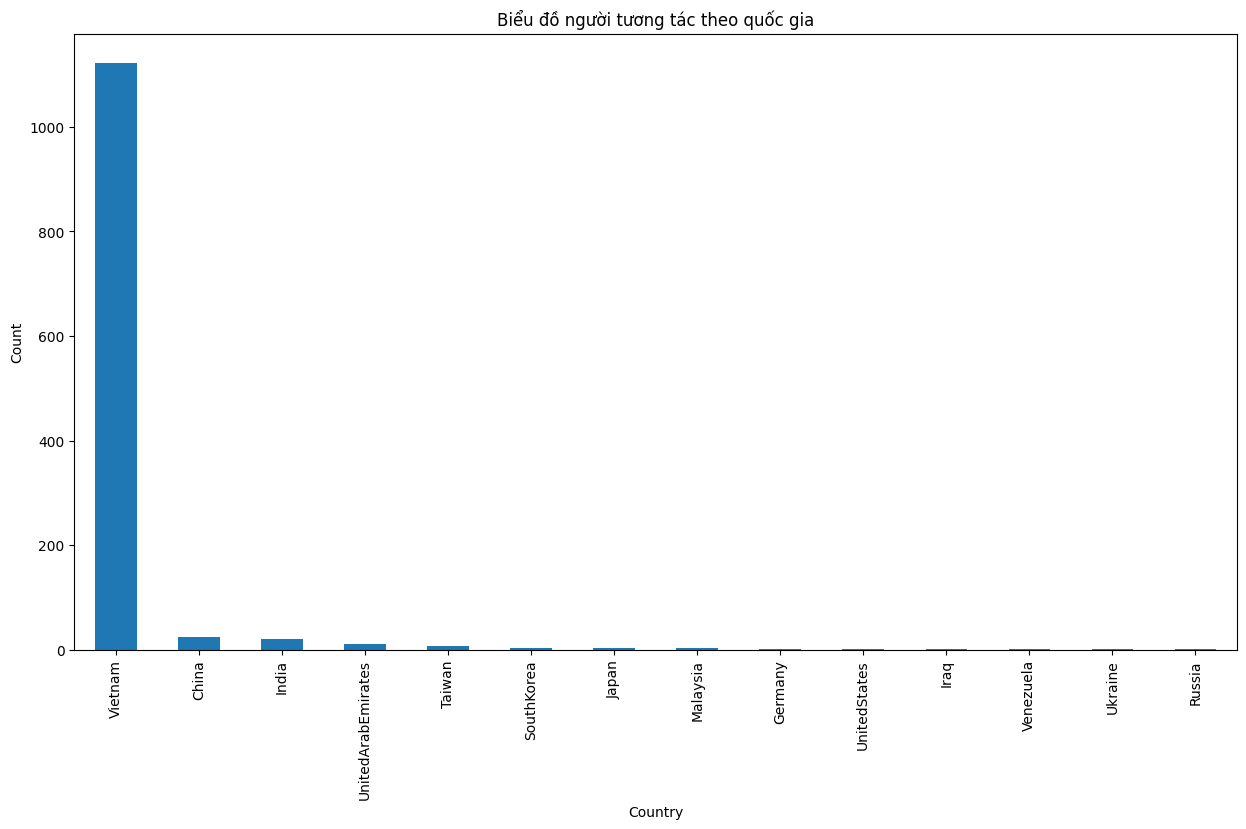

In [97]:
df_commenter['country'].value_counts().plot(kind='bar', figsize=(15,8))
plt.title('Biểu đồ người tương tác theo quốc gia')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show

In [98]:
def classify_education(education):
  if isinstance(education, str):  
    if 'THPT' in education:
        return 'THPT'
    elif 'Đại học' in education:
        return 'Đại học'
    elif 'THCS' in education or 'Trung học cơ sở' in education:
        return 'THCS'
    elif 'Cao đẳng' in education:
        return 'Cao đẳng'
    elif 'University' in education:
        return 'Đại học'
    else:
        return 'Khác'  

df_commenter['Giáo Dục'] = df_commenter['Học vấn'].apply(classify_education)
df_commenter.dropna(subset=['Giáo Dục'], inplace=True)
df_commenter['Giáo Dục']

0       Đại học
1          THPT
2          THPT
3          THPT
7          THPT
         ...   
1193       THPT
1194    Đại học
1195    Đại học
1196    Đại học
1199    Đại học
Name: Giáo Dục, Length: 492, dtype: object

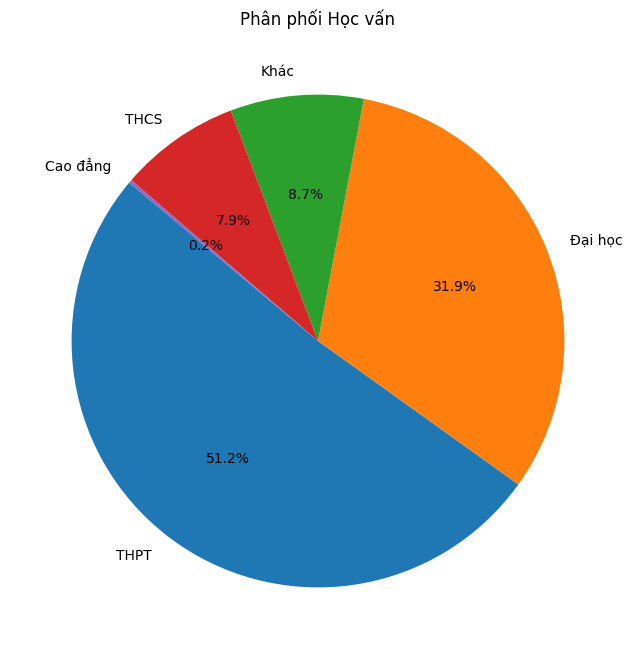

In [99]:
education_counts = df_commenter['Giáo Dục'].value_counts()

# Biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Phân phối Học vấn')
plt.show()